# How to apply CNN models on Custom Build Datasets

### The Dataset Link
https://www.kaggle.com/sanikamal/horses-or-humans-dataset

In [1]:
import tensorflow as tf
tf.__version__

'2.15.0'

!pip install tensorflow

In [2]:
!conda install cudatoolkit

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



!conda install cudnn

In [3]:
tf.config.list_physical_devices('GPU')

[]

# The biggest Problem: Data or Image LABELLING.

# Tensorflow Solution: ImageDataGenerator

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_data: is an instance on the ImageDataGenerator

In [5]:
train_data = ImageDataGenerator(rescale = 1/255)

# flow_from_directory method on class ImageDataGenerator takes the path to a directory and generates batches.

In [6]:
train_generator = train_data.flow_from_directory(
                    'horse-or-human/train/',
                    target_size = (256,256),
                    class_mode = 'binary'
)

Found 1028 images belonging to 2 classes.


## A DirectoryIterator yielding tuples of (x, y) where x is a numpy array containing a batch of images with shape (batch_size, *target_size, channels) and y is a numpy array of corresponding labels.

# Class_Mode is Binary for dual sets, Multiple sets will have a class_mode of type 'categorical'.

##### Constraint in using this Solution: The Directory Structure is Specified as
# Root Dir-->Train ----> Horses -------->*.jpg
#   |                  |
#   |                  |---------> Humans-------->*.jpg
#   |
#   |
#   |------->Validate ---------> horses-------->*.jpg
#                   |
#                   |--------------> Humans-------->*.jpg

### Lets Build a CNN Model for This Dataset

In [7]:
import tensorflow as tf

In [8]:
model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (256,256,3)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation = 'relu'),
            tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [10]:
#!pip install pydot

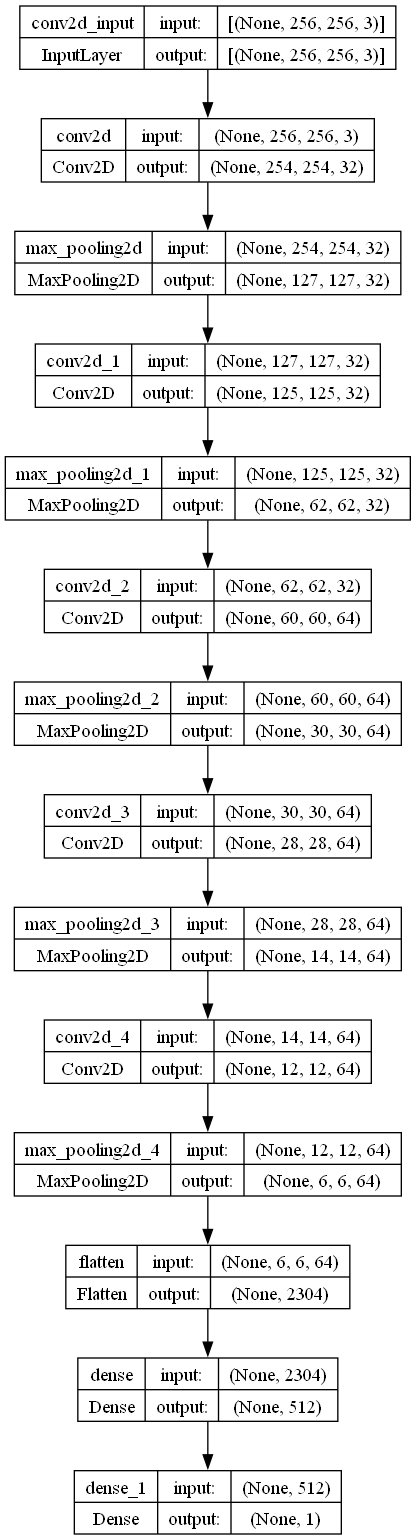

In [11]:
tf.keras.utils.plot_model(model, show_shapes = True)

In [12]:
#optimizer = tf.keras.optimizers.sgd(learning_rate = 0.001)
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
#history = model.fit_generator(train_generator, epochs = 5)

# Validation Vs Testing ---> Whats the Difference???
## Training Data ---> To teach the network to fit data to labels.
## Validation ---> To Check the network's performance while training with previously Unseen Data to inspect the fitting process.
### Testing ----> Inferencing on the previously Unseen Data.

In [14]:
validation_datagen = ImageDataGenerator(rescale = 1/255)
validate_generator = validation_datagen.flow_from_directory(
                    'horse-or-human/validation/',
                    target_size = (256,256),
                    class_mode = 'binary'
)

Found 256 images belonging to 2 classes.


# Incorporate Validation Generator into the training process.

In [15]:
history = model.fit(train_generator, epochs = 10, validation_data = validate_generator)

Epoch 1/10


33/33 [==============================] - 16s 455ms/step - loss: 0.3746 - accuracy: 0.8220 - val_loss: 0.4405 - val_accuracy: 0.8906
Epoch 2/10
33/33 [==============================] - 15s 452ms/step - loss: 0.1264 - accuracy: 0.9553 - val_loss: 0.8816 - val_accuracy: 0.8594
Epoch 3/10
33/33 [==============================] - 15s 472ms/step - loss: 0.0470 - accuracy: 0.9815 - val_loss: 2.1840 - val_accuracy: 0.8047
Epoch 4/10
33/33 [==============================] - 19s 560ms/step - loss: 0.0375 - accuracy: 0.9874 - val_loss: 1.3608 - val_accuracy: 0.8516
Epoch 5/10
33/33 [==============================] - 17s 514ms/step - loss: 0.0649 - accuracy: 0.9737 - val_loss: 2.8924 - val_accuracy: 0.7812
Epoch 6/10
33/33 [==============================] - 17s 501ms/step - loss: 0.0164 - accuracy: 0.9932 - val_loss: 1.7756 - val_accuracy: 0.8594
Epoch 7/10
33/33 [==============================] - 16s 470ms/step - loss: 0.0027 - accuracy: 0.9990 - val_loss: 2.7025 - val_accuracy: 0.83

# *How to verify your model has trained well or Not*

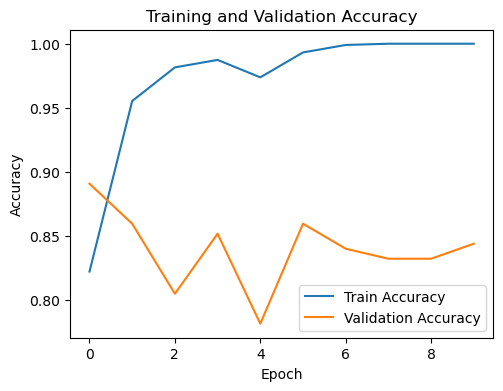

In [16]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

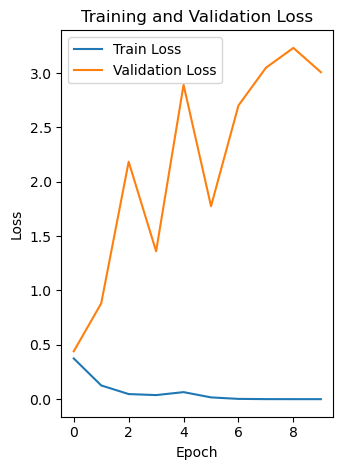

In [17]:
# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# How to Test this Trained Model?

In [18]:
test_data_dir = 'horse-or-human_Test'
# Create a test data generator
test_generator = ImageDataGenerator(rescale=1/255.0).flow_from_directory(
    'horse-or-human/validation/',
    target_size=(256, 256),
    class_mode='binary',
    shuffle=False  # Set shuffle to False for test data
)

Found 256 images belonging to 2 classes.


In [19]:
# Evaluate the model on the test data
evaluation_result = model.evaluate(test_generator)

# Display the evaluation result
print("Test Loss:", evaluation_result[0])
print("Test Accuracy:", evaluation_result[1])

8/8 [==============================] - 1s 141ms/step - loss: 3.0085 - accuracy: 0.8438
Test Loss: 3.008542776107788
Test Accuracy: 0.84375


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [21]:
# Generate predictions
predictions = model.predict(test_generator)
#predictions = predictions / predictions.sum(axis=1, keepdims=True)
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

8/8 [==============================] - 1s 144ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [22]:
predictions

array([[1.87913344e-07],
       [6.88228567e-07],
       [1.25444305e-04],
       [1.75678311e-03],
       [1.00000000e+00],
       [2.38999535e-04],
       [1.52035055e-16],
       [1.57963174e-22],
       [2.01133845e-20],
       [2.21337570e-20],
       [5.63713742e-14],
       [2.65984915e-19],
       [1.45481275e-24],
       [2.14357026e-25],
       [1.02784909e-25],
       [1.69852671e-17],
       [1.08827303e-09],
       [5.37238662e-08],
       [3.95694769e-05],
       [1.00000000e+00],
       [3.32322525e-05],
       [2.04313452e-15],
       [7.90069986e-04],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99992788e-01],
       [1.00000000e+00],
       [3.56510660e-04],
       [1.78672854e-09],
       [2.54734012e-10],
       [1.04175095e-08],
       [9.54159714e-06],
       [8.51883719e-09],
       [2.51667444e-07],
       [9.99990046e-01],
       [1.00000000e+00],
       [1.86671346e-01],
       [3.98479477e-02],
       [1.00000000e+00],


In [23]:
label_map = (train_generator.class_indices)

In [24]:
label_map

{'horses': 0, 'humans': 1}

In [25]:
# Get true labels
true_labels = test_generator.classes
true_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

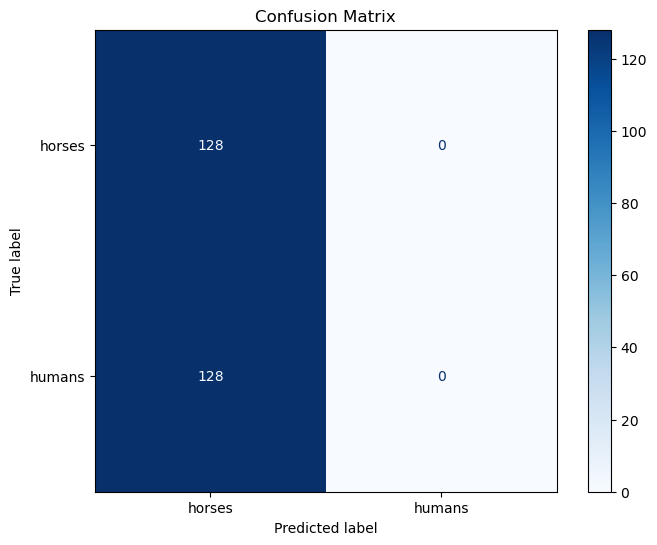

In [27]:
# Plot confusion matrix
labels = test_generator.class_indices.keys()
display = ConfusionMatrixDisplay(conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(8, 6))
display.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

### Predicting Images from Test Data

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing import image
X1 = []
path = 'Test_Images_HH' 
img_list = os.listdir(path)
for img in img_list:
    img_test = image.load_img(path+'/'+img, target_size=(256,256))
    x = image.img_to_array(img_test)
    x = np.expand_dims(x, axis=0)
    X1.append(x)
X11 = np.array(X1)

In [29]:
# Select an image You want to Test (Max value = 30)
i = 2
X11[i]
img_list[i]
img_show = image.load_img(path+'/'+img_list[i])

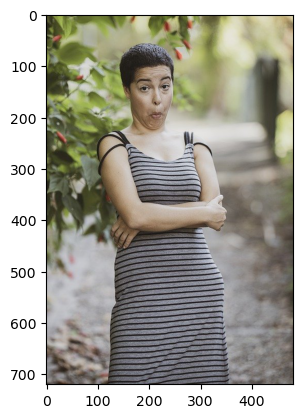

In [30]:
image_tensor = np.vstack([X11[i]])
## Images stacked Vertically to mimic the shape of training data
plt.imshow(img_show)

In [31]:
classes = model.predict(image_tensor)

1/1 [==============================] - 0s 107ms/step


In [32]:
if classes[0]>0.5:
    print(img_list[i] + " is human")
else:
    print(img_list[i] + " is a horse")

h7.jpg is human


## Why My Model is predicting h11 as a horse?

# Less Training 
## Less Variety of Training Data
### How to Increse the Variety of training data when we have less data?